In [162]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [163]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [164]:
def scaler_split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    return x_train, x_test, y_train, y_test 

In [165]:
def pca(x_train, x_test, n):
    pca = PCA(n_components = n)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    return x_train_pca, x_test_pca, explained_variance

In [166]:
def cm_prediction(classifier, x_test_pca):
    y_pred = classifier.predict(x_test_pca)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return classifier, accuracy, report, x_test_pca, y_test, cm

In [167]:
def logistic(x_train_pca,y_train,x_test_pca):       
    classifier = LogisticRegression(random_state=0)
    classifier.fit(x_train_pca, y_train)
    classifier,accuracy,report,x_test_pca,y_test,cm = cm_prediction(classifier,x_test_pca)
    return  classifier,accuracy,report,x_test_pca,y_test,cm   

In [168]:
def svm_linear(x_train_pca, y_train, x_test_pca):
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(x_train_pca, y_train)
    classifier, accuracy, report, x_test_pca, y_test, cm = cm_prediction(classifier, x_test_pca) 
    return  classifier,accuracy,report,x_test_pca,y_test,cm  

In [169]:
def svm_nl(x_train_pca, y_train, x_test_pca):
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(x_train_pca, y_train)
    classifier, accuracy, report, x_test_pca, y_test, cm = cm_prediction(classifier, x_test_pca) 
    return  classifier,accuracy,report,x_test_pca,y_test,cm    

In [170]:
def knn(x_train_pca, y_train, x_test_pca):
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(x_train_pca, y_train)
    classifier, accuracy, report, x_test_pca, y_test, cm = cm_prediction(classifier, x_test_pca)
    return  classifier,accuracy,report,x_test_pca,y_test,cm   

In [171]:
def naive(x_train_pca, y_train, x_test_pca):
    classifier = GaussianNB()
    classifier.fit(x_train_pca, y_train)
    classifier, accuracy, report, x_test_pca, y_test, cm = cm_prediction(classifier, x_test_pca)
    return  classifier,accuracy,report,x_test_pca,y_test,cm   

In [172]:
def decision(x_train_pca, y_train, x_test_pca):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(x_train_pca, y_train)
    classifier, accuracy, report, x_test_pca, y_test, cm = cm_prediction(classifier, x_test_pca) 
    return  classifier,accuracy,report,x_test_pca,y_test,cm   

In [173]:
def random(x_train_pca, y_train, x_test_pca):
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(x_train_pca, y_train)
    classifier, accuracy, report, x_test_pca, y_test, cm = cm_prediction(classifier, x_test_pca) 
    return  classifier,accuracy,report,x_test_pca,y_test,cm   

In [174]:
def pca_classification(acclog, accsvml, accsvmnl, accknn, accnaive, accdeci, accrand):
    dataframe = pd.DataFrame(index = ['PCA'], columns = ['Logistic', 'SVML', 'SVMNL', 'KNN', 'Naive', 'Decision', 'Random'])
    for number, item in enumerate(dataframe.index):       # Enumerate - it is a counter that adds index to each items in an iterable
        dataframe['Logistic'][item] = acclog[number]
        dataframe['SVML'][item] = accsvml[number]
        dataframe['SVMNL'][item] = accsvmnl[number]
        dataframe['KNN'][item] = accknn[number]
        dataframe['Naive'][item] = accnaive[number]
        dataframe['Decision'][item] = accdeci[number]
        dataframe['Random'][item] = accrand[number]
    return dataframe        

In [175]:
dataset = pd.read_csv('Employee_Attrition_Dataset.csv', index_col = None)  # index_col - keep the default index not allowing the input to reset the index position
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [176]:
# dataset.drop(['EmployeeCount', 'EmployeeNumber','StandardHours'], axis = 1, inplace = True)

In [177]:
df1 = pd.get_dummies(dataset, dtype = int, drop_first = True)
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


In [178]:
# Input and Output Split
x = df1.drop("Attrition_Yes", axis =1)
y = df1['Attrition_Yes']

In [179]:
acclog = []
accsvml = []
accsvmnl = []
accknn = []
accnaive = []
accdeci = []
accrand = []
n_components_list = []

In [180]:
x_train, x_test, y_train, y_test = scaler_split(x, y)

In [181]:
for n in range(1,40):
    x_train_pca, x_test_pca, explained_variance = pca(x_train, x_test, n)
    
    classifier, accuracy, report, x_test_pca, y_test,cm = logistic(x_train_pca,y_train,x_test_pca)
    acclog.append(accuracy)
    
    classifier, accuracy, report, x_test_pca, y_test, cm = svm_linear(x_train_pca, y_train, x_test_pca)
    accsvml.append(accuracy)
    
    classifier, accuracy, report, x_test_pca, y_test, cm = svm_nl(x_train_pca, y_train, x_test_pca)
    accsvmnl.append(accuracy)
    
    classifier, accuracy, report, x_test_pca, y_test, cm = knn(x_train_pca, y_train, x_test_pca)
    accknn.append(accuracy)
    
    classifier, accuracy, report, x_test_pca, y_test, cm = naive(x_train_pca, y_train, x_test_pca)
    accnaive.append(accuracy)
    
    classifier, accuracy, report, x_test_pca, y_test, cm = decision(x_train_pca, y_train, x_test_pca)
    accdeci.append(accuracy)
    
    classifier, accuracy, report, x_test_pca, y_test, cm = random(x_train_pca, y_train, x_test_pca)
    accrand.append(accuracy)

    n_components_list.append(n)

In [182]:
results_df = pd.DataFrame({
    'PCA': n_components_list,
    'Logistic': acclog,
    'SVML': accsvml,
    'SVMNL': accsvmnl,
    'KNN'  : accknn,
    'Naive': accnaive,
    'Decision': accdeci,
    'Random': accrand
})


results_df.set_index('PCA', inplace=True)

# Print the final result table
print(results_df)

     Logistic      SVML     SVMNL       KNN     Naive  Decision    Random
PCA                                                                      
1    0.841270  0.841270  0.841270  0.820862  0.841270  0.734694  0.748299
2    0.841270  0.841270  0.845805  0.823129  0.841270  0.743764  0.834467
3    0.845805  0.841270  0.848073  0.829932  0.843537  0.784580  0.834467
4    0.848073  0.841270  0.848073  0.841270  0.848073  0.741497  0.834467
5    0.848073  0.841270  0.848073  0.836735  0.850340  0.734694  0.827664
6    0.848073  0.841270  0.850340  0.839002  0.852608  0.727891  0.832200
7    0.848073  0.841270  0.848073  0.839002  0.854875  0.702948  0.839002
8    0.848073  0.841270  0.852608  0.841270  0.852608  0.736961  0.834467
9    0.848073  0.841270  0.848073  0.841270  0.839002  0.750567  0.834467
10   0.848073  0.841270  0.848073  0.843537  0.841270  0.743764  0.834467
11   0.845805  0.841270  0.848073  0.848073  0.845805  0.770975  0.841270
12   0.850340  0.841270  0.852608  0.8

Explained variance ratio: [0.69131844 0.30151652]
Total explained variance (2 components): 0.9928349594737373


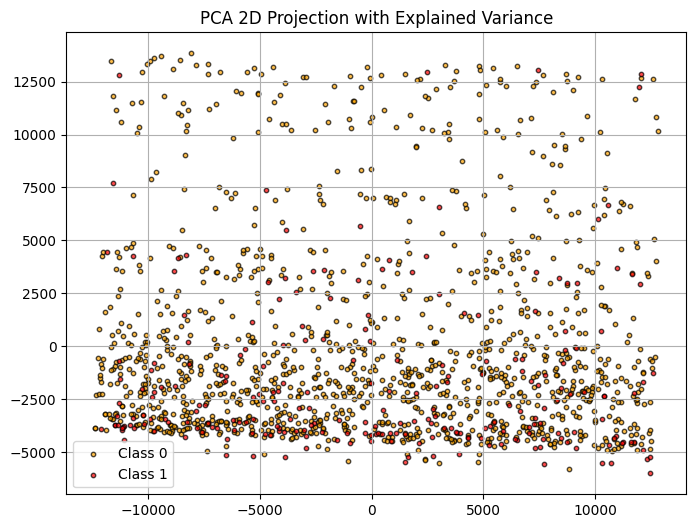

In [183]:
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)  # x = feature matrix(,0:28)

# Explained variance
explained_var = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_var)
print("Total explained variance (2 components):", np.sum(explained_var))

# Plot
plt.figure(figsize=(8,6))
colors = ['orange', 'red']

for label, color in zip([0, 1], colors):
    plt.scatter(
        x_pca[y == label, 0],
        x_pca[y == label, 1],
        label=f"Class {label}",
        alpha=0.7,
        edgecolor='k',
        s=10,
        c=color
    )

plt.title("PCA 2D Projection with Explained Variance")
plt.legend()
plt.grid(True)
plt.show()
